Ссылка на Burr distribution https://en.wikipedia.org/wiki/Burr_distribution

In [44]:
import numpy as np
import math
import scipy.stats as sts
from matplotlib import pyplot as plt

%matplotlib inline

In [55]:
# Выбор параметров для распределения
c = 10.6
k = 7.5

In [56]:
#Вычисление теоритических мат. ожидания, среднеквадратического отклонения и дисперсии распределения
Mx = sts.burr.mean(c, k)
print("Математическое ожидание равно {}".format(Mx))
Dx = sts.burr.var(c, k)
print("Дисперсия равна {}".format(Dx))
std = sts.burr.std(c, k)
print("Среднеквадратическое отклонение равно {}".format(std))

Математическое ожидание равно 1.2794393229400591
Дисперсия равна 0.030176040302819285
Среднеквадратическое отклонение равно 0.17371252200926474


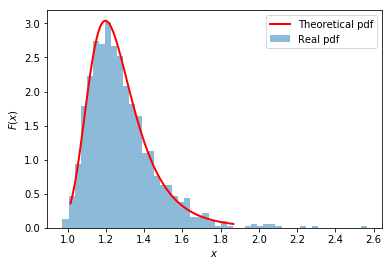

In [59]:
#Генерирование выборки объёмом 1000
sampleRange = sts.burr.rvs(c, k, size=1000)
#Построение гистограммы выборки
plt.hist(sampleRange, density=True, bins=50, alpha = 0.5, label='Real pdf')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#Вычисление теоретической плотности распределения случайной величины, построение её графика поверх гистограммы
left = sts.burr.ppf(0.01, c, k)
right =  sts.burr.ppf(0.99, c, k)
x = np.linspace(left,  right, 100)
plt.plot(x, sts.burr.pdf(x, c, k), 'r-', lw=2, label='Theoretical pdf')
plt.legend(loc='best')

Среднеквадратическое отклонение равно 0.07768660155112886


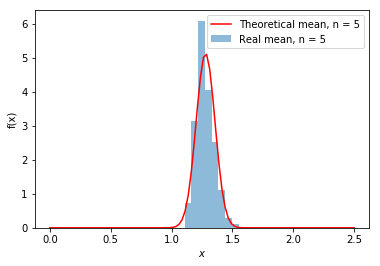

Среднеквадратическое отклонение равно 0.05493272276414058


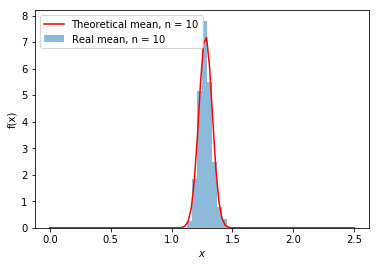

Среднеквадратическое отклонение равно 0.024566660457953696


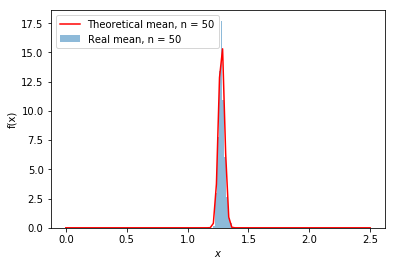

In [65]:
for n in [5, 10, 50]:
    #генерация выборок
    values = np.array([sts.burr.rvs(c, k, size=n) for i in range(1000)])
    #вычисление выборочных средних
    meanVal = values.mean(axis=1)
    plt.hist(meanVal, density=True, alpha=0.5, label='Real mean, n = {}'.format(n))
    
    #мат. ожидание и среднеквадратическое отклонение нормального распределения
    mu = Mx
    sigma = math.sqrt(Dx/n)
    print('Среднеквадратическое отклонение равно {}'.format(sigma)) 
    # задаём нормальное распределенние
    x = np.linspace(0, 2.5, 100)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    theor_val = norm_rv.pdf(x)
    plt.plot(x, theor_val,'r-', label='Theoretical mean, n = {}'.format(n))
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

## Вывод: 
Распределение выборочных средних для функции burr хорошо описывается нормальным распределением.
С ростом n точность аппроксимации увеличивается.